<a href="https://colab.research.google.com/github/deepshikharbhardwaj/Character-Region-Awareness-for-Text/blob/main/CRAFT_M20MA004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from os.path import exists, join, basename, splitext
git_repo_url = 'https://github.com/deepshikharbhardwaj/Character-Region-Awareness-for-Text.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q {git_repo_url}
  #!cd {project_name} && pip install -q -r requirements.txt
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False
print(project_name)

Character-Region-Awareness-for-Text


## Download pretrained model

In [ ]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}
  

pretrained_model = 'craft_mlt_25k.pth'
if not exists(pretrained_model):
  # download the pretrained model
  #!wget -q -O {pretrained_model} 'https://drive.google.com/file/d/1i2R7UIUqmkUtF0jv_3MXTqmQ_9wuAnLf/view'
  !wget -q -O {pretrained_model} 'https://drive.google.com/uc?authuser=0&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ&export=download'
#https://drive.google.com/uc?authuser=0&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ&export=download
#https://drive.google.com/open?id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ
#https://drive.google.com/file/d/1i2R7UIUqmkUtF0jv_3MXTqmQ_9wuAnLf/view

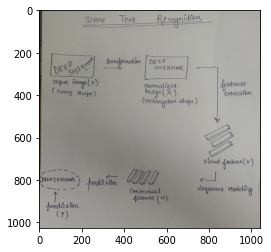

In [ ]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/billboard.jpg'
#https://github.com/deepshikharbhardwaj/Speach-to-text/blob/main/stt.png?raw=true
#https://raw.githubusercontent.com/deepshikharbhardwaj/Speach-to-text/main/stt.png
#IMAGE_URL = 'https://raw.githubusercontent.com/deepshikharbhardwaj/Speach-to-text/main/stt.png'
IMAGE_URL = 'https://raw.githubusercontent.com/deepshikharbhardwaj/Character-Region-Awareness-for-Text/main/image.jpg'

image_file_name = basename(IMAGE_URL)
download_dir = '/content/images'
!mkdir -p {download_dir} && rm -rf {download_dir}/*
!wget -q -P {download_dir} {IMAGE_URL}
  

plt.imshow(matplotlib.image.imread(join(download_dir, image_file_name)))

Run CRAFT on the above test image:

In [ ]:
!cd {project_name} && python test.py --trained_model=../{pretrained_model} --test_folder=/content/images

Loading weights from checkpoint (../craft_mlt_25k.pth)
elapsed time : 0.6183030605316162s


Now, visualize the result:

image.jpg


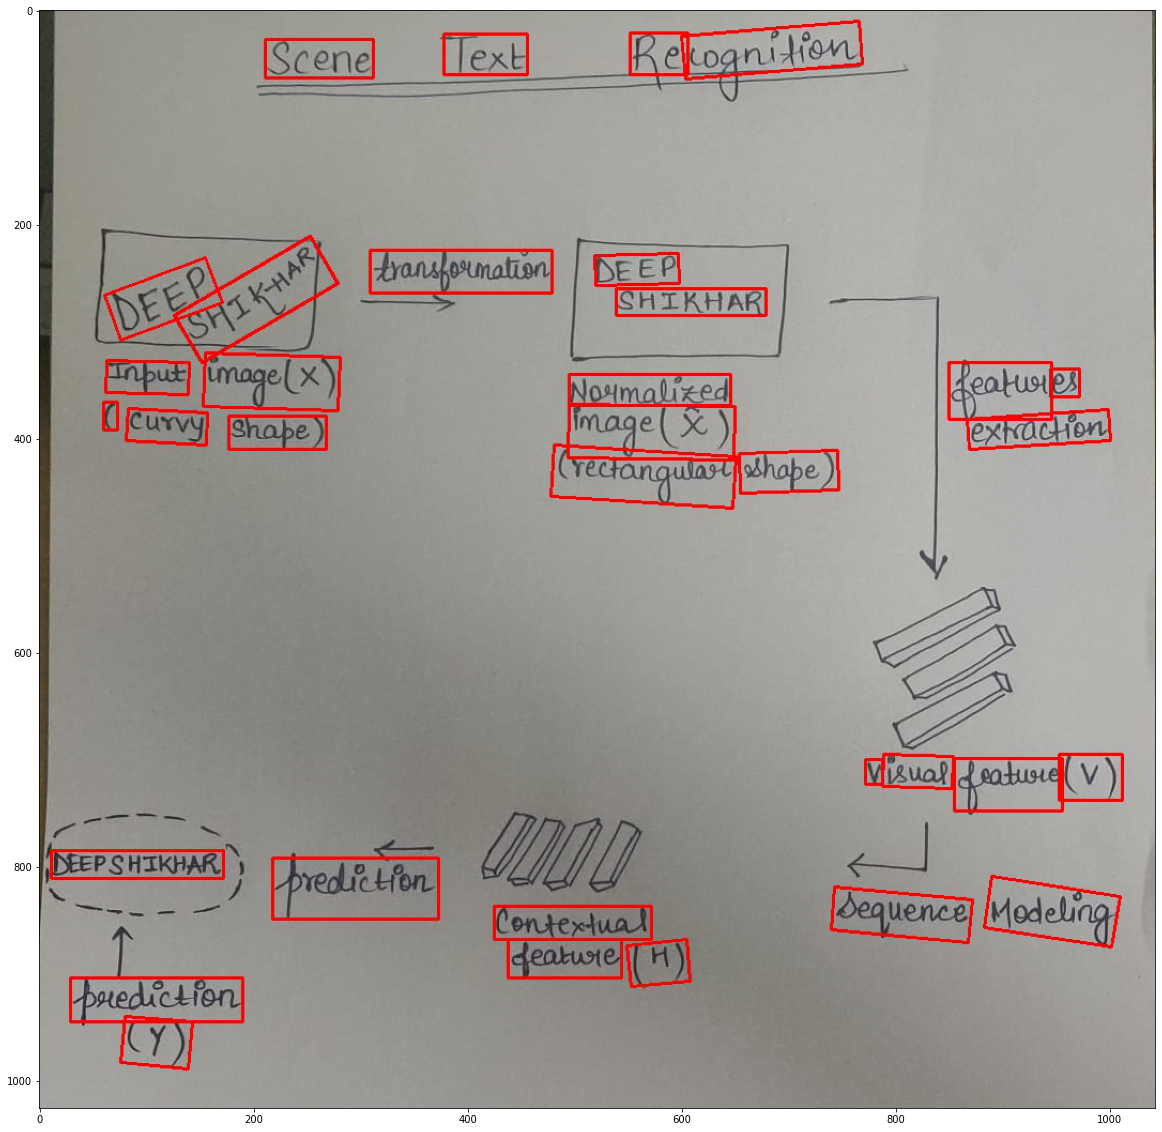

In [ ]:
plt.figure(figsize=(20, 26))
#plt.imshow(matplotlib.image.imread(join(project_name, 'result','res_'+image_file_name)))
#plt.imshow(matplotlib.image.imread(join('/content/', 'result','res_'+image_file_name)))
imgg = join('/content/Character-Region-Awareness-for-Text/', 'result','res_'+image_file_name)
plt.imshow(matplotlib.image.imread(imgg))
#/content/Character-Region-Awareness-for-Text/result/res_im.jpg

print(image_file_name)